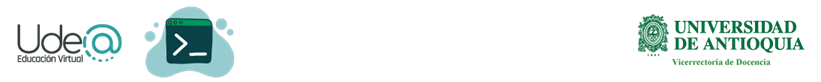

# <h1><center>Evaluación de Clustering con Diferentes Métricas</center></h1>

**Especialización en Analítica de Datos**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


**2025-1**


# Evaluación de Clustering con Diferentes Métricas
En este notebook, se ilustrarán diferentes métricas para evaluar el proceso de clustering usando un conjunto de datos de ejemplo.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generar datos de ejemplo
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


## Aplicar diferentes métodos de clustering

In [ ]:
# K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

# Clustering Aglomerativo
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels_dbscan = dbscan.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Visualizar los resultados del clustering con PCA

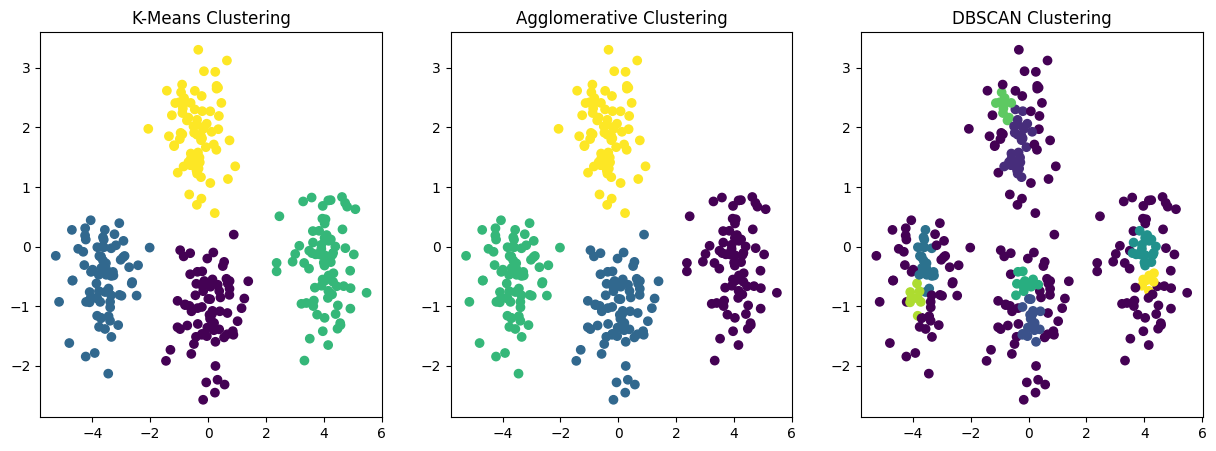

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans)
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_agglo)
plt.title('Agglomerative Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan)
plt.title('DBSCAN Clustering')

plt.show()


## Evaluación de las técnicas de clustering utilizando diferentes métricas

In [ ]:
# Índice de Silhouette
silhouette_kmeans = silhouette_score(X, labels_kmeans)
silhouette_agglo = silhouette_score(X, labels_agglo)
silhouette_dbscan = silhouette_score(X, labels_dbscan)
silhouette_kmeans, silhouette_agglo, silhouette_dbscan


(0.6819938690643478, 0.6819938690643478, -0.25081172884728203)

In [ ]:
# Índice de Davies-Bouldin
db_index_kmeans = davies_bouldin_score(X, labels_kmeans)
db_index_agglo = davies_bouldin_score(X, labels_agglo)
db_index_dbscan = davies_bouldin_score(X, labels_dbscan)
db_index_kmeans, db_index_agglo, db_index_dbscan


(0.43756400782378385, 0.43756400782378385, 2.331978665438723)

In [ ]:
# Índice de Calinski-Harabasz
ch_index_kmeans = calinski_harabasz_score(X, labels_kmeans)
ch_index_agglo = calinski_harabasz_score(X, labels_agglo)
ch_index_dbscan = calinski_harabasz_score(X, labels_dbscan)
ch_index_kmeans, ch_index_agglo, ch_index_dbscan


(1210.0899142587816, 1210.0899142587818, 21.101147381961358)

In [ ]:
# Índice de Rand Ajustado (ARI)
ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)
ari_agglo = adjusted_rand_score(y_true, labels_agglo)
ari_dbscan = adjusted_rand_score(y_true, labels_dbscan)
ari_kmeans, ari_agglo, ari_dbscan


(1.0, 1.0, 0.09360008783659203)

In [ ]:
# Índice de Información Mutua Ajustado (AMI)
ami_kmeans = adjusted_mutual_info_score(y_true, labels_kmeans)
ami_agglo = adjusted_mutual_info_score(y_true, labels_agglo)
ami_dbscan = adjusted_mutual_info_score(y_true, labels_dbscan)
ami_kmeans, ami_agglo, ami_dbscan


(1.0, 1.0, 0.3871149713898637)

In [ ]:
# Índice Fowlkes-Mallows (FMI)
fmi_kmeans = fowlkes_mallows_score(y_true, labels_kmeans)
fmi_agglo = fowlkes_mallows_score(y_true, labels_agglo)
fmi_dbscan = fowlkes_mallows_score(y_true, labels_dbscan)
fmi_kmeans, fmi_agglo, fmi_dbscan


(1.0, 1.0, 0.3662907552610442)

<h2>Interpretación de Resultados</h2>

<p>A continuación, se presentan los resultados obtenidos para cada una de las métricas aplicadas a los diferentes métodos de clustering:</p>

<h3>1. Índice de Silhouette</h3>
<p><strong>Interpretación:</strong> Un valor de Silhouette cercano a 1 indica que los puntos están bien agrupados dentro de sus propios clusters y alejados de otros clusters. Valores cercanos a 0 sugieren que los puntos están en el límite entre dos clusters, mientras que valores negativos indican que los puntos pueden estar asignados al cluster incorrecto. Compara los valores para K-Means, Agglomerative Clustering y DBSCAN para ver cuál forma los clusters más coherentes.</p>

<h3>2. Índice de Davies-Bouldin</h3>
<p><strong>Interpretación:</strong> Esta métrica evalúa la compactación dentro de los clusters y la separación entre ellos. Un valor más bajo del índice de Davies-Bouldin indica clusters más compactos y mejor separados, lo que sugiere un mejor rendimiento del algoritmo de clustering.</p>

<h3>3. Índice de Calinski-Harabasz</h3>
<p><strong>Interpretación:</strong> Un valor más alto del índice de Calinski-Harabasz indica que los clusters están bien definidos, con una buena separación entre ellos y alta cohesión interna. Este índice es útil para comparar el rendimiento de diferentes configuraciones de clusters.</p>

<h3>4. Índice de Rand Ajustado (ARI)</h3>
<p><strong>Interpretación:</strong> El ARI mide la similitud entre los clusters obtenidos y una clasificación de referencia (en este caso, <code>y_true</code>). Un valor cercano a 1 indica una alta coincidencia con la clasificación de referencia. Es útil cuando se dispone de etiquetas verdaderas para evaluar la precisión del clustering.</p>

<h3>5. Índice de Información Mutua Ajustado (AMI)</h3>
<p><strong>Interpretación:</strong> Similar al ARI, el AMI mide la cantidad de información compartida entre la partición generada por el clustering y la partición de referencia. Un valor cercano a 1 indica una alta similitud entre ambas particiones, lo que sugiere que el algoritmo de clustering ha capturado bien la estructura subyacente de los datos.</p>

<h3>6. Índice Fowlkes-Mallows (FMI)</h3>
<p><strong>Interpretación:</strong> El FMI evalúa la precisión del clustering al considerar los pares de puntos que están correctamente clasificados en el mismo cluster. Un valor cercano a 1 indica un buen rendimiento del clustering en comparación con la clasificación de referencia.</p>

<h3>Consideraciones finales General:</h3>
<p>Comparando los valores de estas métricas para los diferentes métodos de clustering, puedes determinar cuál de los algoritmos utilizados (K-Means, Agglomerative Clustering o DBSCAN) se adapta mejor a los datos proporcionados. Es posible que un método ofrezca una mejor cohesión interna de los clusters (por ejemplo, con un mejor índice de Silhouette), mientras que otro podría ofrecer una mejor separación entre clusters (reflejado en un índice de Davies-Bouldin más bajo). Al final, la elección del método de clustering más adecuado dependerá de las características específicas de los datos y los objetivos del análisis.
